# **Project 3 - Explainable AI with SHAP**


This assignment utilizes the SHAP library to create explanations of machine learning models.

Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples.

Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments.

Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.





**STUDENT ANSWER:**

XAI tools like SHAP are nice because they make complex models easier to understand. They show us which features affect predictions, which is important for trusting AI. In healthcare, for example, SHAP can explain why a patient’s risk score is high or low by breaking down factors like age or blood pressure, helping doctors understand the prediction better. In finance, SHAP helps lenders see what influences a credit score, making decisions fairer and more transparent. In retail, SHAP can highlight why certain customers might leave, so companies can try to keep them around. 

## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]** Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

In [5]:
# It is recommended to use this version of SHAP:
!pip install shap==0.46.0

   ---------------------------------------- 14.0/14.0 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires matplotlib, which is not installed.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
seaborn 0.11.2 requires matplotlib>=2.2, which is not installed.
contourpy 1.3.0 requires numpy>=1.23, but you have numpy 1.21.6 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.21.6 which is incompatible.


### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

ImportError: cannot import name 'artist' from 'matplotlib' (c:\Users\jasev\anaconda3\lib\site-packages\matplotlib\__init__.py)

### Data preparation

In [3]:
# Lets prepare the data: have a look at the outputs.
data, target = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# We have 8 features and a single target value (the value of the house).
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


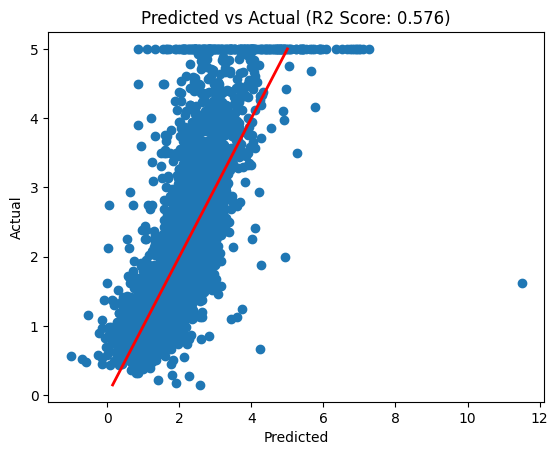

In [4]:
# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot predicted vs actual values
score = r2_score(y_test, linear_model.predict(X_test))
print(f"R2 Score: {score:.3f}")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.scatter(linear_model.predict(X_test), y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Coefficients

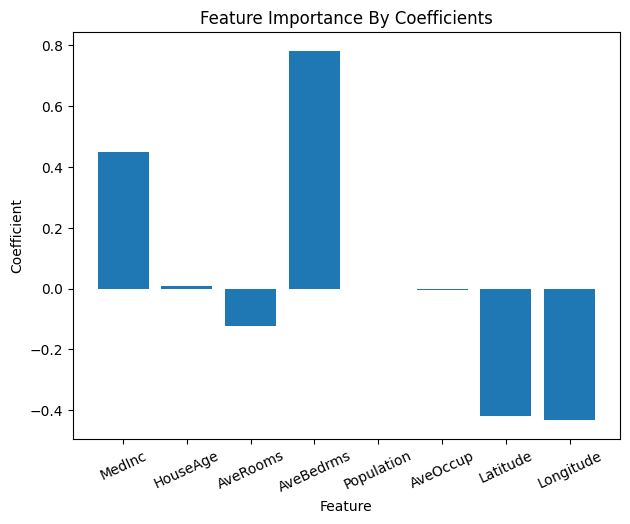

In [5]:
# Plot the coefficients of the linear model with feature names
# For linear models, the coefficients is an easy way to interpret feature importance
plt.bar(data.columns, linear_model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.title("Feature Importance By Coefficients")
plt.xticks(rotation=25)
plt.show()

### SHAP feature importance

ExactExplainer explainer: 4129it [00:23, 134.41it/s]                          


SHAP values shape: (4128, 8)


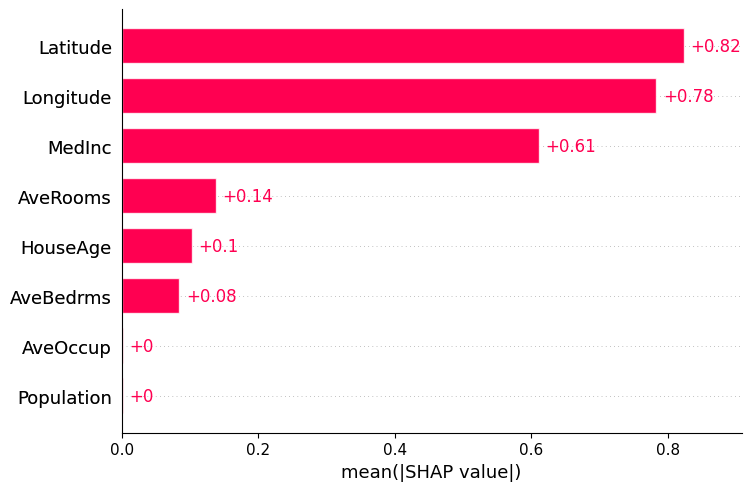

In [6]:
# Now we use SHAP for feature importance
# We use the training dataset as background data for SHAP
explainer = shap.Explainer(linear_model.predict, X_train)
explain_data = X_test
# We calculate the shap_values of the test data
shap_values = explainer(explain_data)
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

The coefficients in a model show how much a feature pushes the prediction up or down, but they don’t really tell us how important the feature is overall. So, when AveBedrms has a big coefficient, it just means that a small change in it makes a noticeable difference in the prediction, but it doesn’t really mean it’s the most important feature. SHAP values, on the other hand, give a better picture of which features actually have the most impact on predictions by showing how much each one contributes in each individual case. The distribution of the data also matters here. Features like Latitude and Longitude vary a lot in the dataset (which we can see in data.describe), so they end up being more important in the SHAP values because they affect the prediction more from observation to observation. AveBedrms, on the other hand, might vary less, so even with a big coefficient, it’s less important overall.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


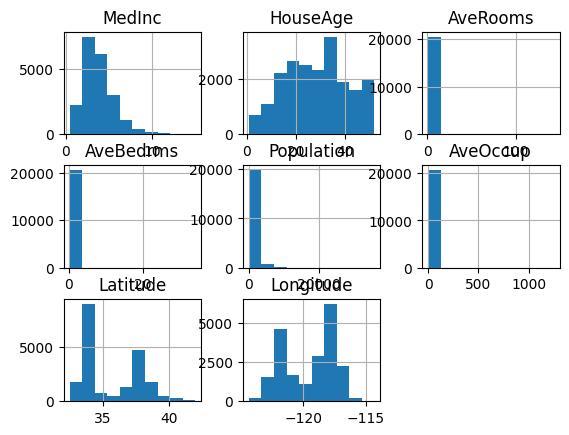

In [7]:
data.hist()
data.describe()

### **[STORY]** Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


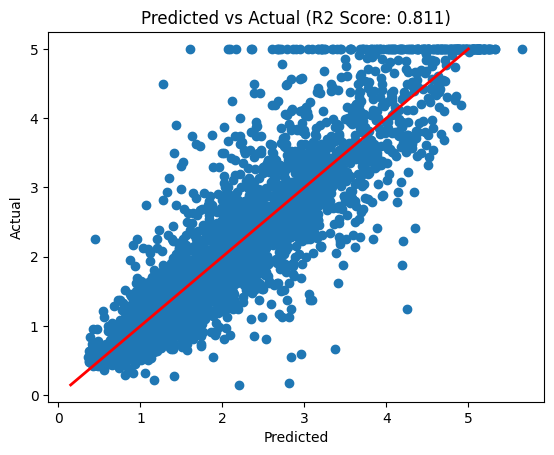

In [8]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train)

# Lets see if it performs better than the linear model
y_pred = boosting_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.show()

In [9]:
# We use a SHAP explainer to generate SHAP values for the boosting model.
# We provide the training dataset as background data (reference values).
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values = explainer(explain_data)

ExactExplainer explainer: 4129it [03:11, 20.43it/s]                          


### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:

* 3.1 How does your selected plot visualize shap_values?

* 3.2 Which features are important and which are not?

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

**STUDENT ANSWER:**

3.1 The beeswarm plot visualizes SHAP values by showing each feature's impact on the model output across all data points. Each dot represents a SHAP value for a particular instance, with color indicating the feature value (red for high, blue for low). This layout lets us quickly see the range and distribution of SHAP values for each feature, as well as the overall importance based on spread.

3.2 From the beeswarm plot, the most important features are Latitude, Longitude, and MedInc because they have the largest spread in SHAP values, meaning they have a big impact on predictions. Less important features like Population and AveBedrms have very little spread, indicating they don’t contribute much to the model's predictions.

3.3 Some features do not have a monotonic relationship with SHAP values. Latitude and Longitude have both positive and negative SHAP values across their range, meaning their relationship with the target variable is complex and not strictly increasing or decreasing. This mix of high and low SHAP values shows they influence the prediction in both directions, depending on their specific values.

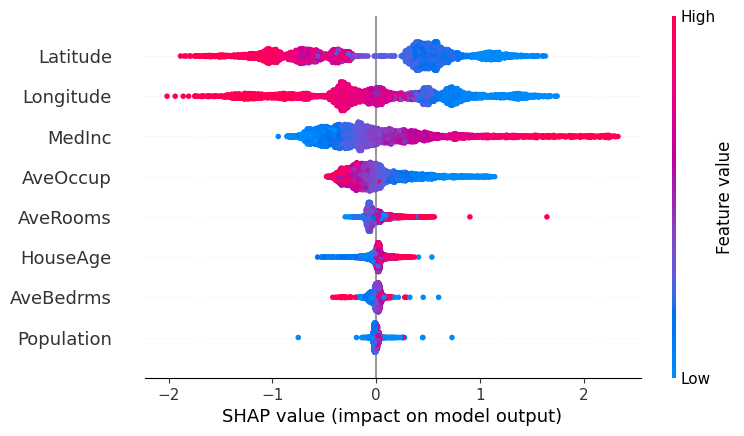

In [10]:
shap.plots.beeswarm(shap_values)

### **[STORY]** Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

**STUDENT ANSWER:**

In [11]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)

# (hint: use the explainer from earlier)
base1_pred = boosting_model.predict(base1)
base2_pred = boosting_model.predict(base2)

print(base1_pred, base2_pred)

shap_base1_pred = explainer(base1)

[3.13735577] [2.86046026]


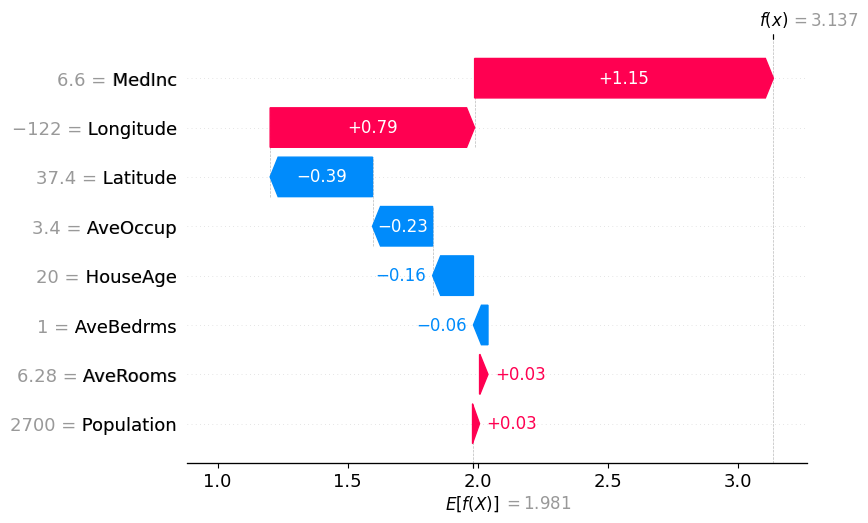

In [21]:
shap.plots.waterfall(shap_base1_pred[0])

4.1 Base1 has the highest value.

4.2 Looking at the SHAP waterfall plot, we can see how each feature affects the prediction for base1. MedInc (median income) has the biggest impact, adding +1.15 to the prediction, which pushes the value up quite a bit. Longitude also bumps up the prediction a good amount, while Latitude pulls it down a bit. Other features like AveOccup and HouseAge have smaller negative effects, and AveRooms and Population barely make a difference.

4.3 For base1, that would mean taking away the +1.15 boost from MedInc, which would drop its prediction a lot. Without MedInc, base2 would probably have the higher prediction, since base1’s score would be much lower.

## **Mission Part 2:** 🛡️ Reveal SkyNet's trap


### **[STORY]** While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]** Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

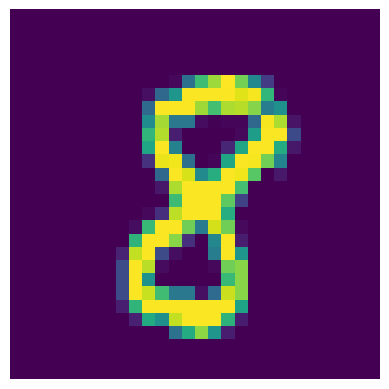

In [12]:
# Download MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Images are originally 1d: reshape back to 28x28.
plt.imshow(X_train[1337].reshape(28, 28))
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [13]:
# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train a neural network

In [14]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    # Returns logits
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Returns class prediction
    def forward_digit(self, x):
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
# Pretty heavy regularization, but results in less noise in SHAP values
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01)

# Train the model
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9087
Epoch 2/10, Test Accuracy: 0.9238
Epoch 3/10, Test Accuracy: 0.9304
Epoch 4/10, Test Accuracy: 0.9315
Epoch 5/10, Test Accuracy: 0.9395
Epoch 6/10, Test Accuracy: 0.9381
Epoch 7/10, Test Accuracy: 0.9396
Epoch 8/10, Test Accuracy: 0.9372
Epoch 9/10, Test Accuracy: 0.9445
Epoch 10/10, Test Accuracy: 0.9437


### Check out some predictions

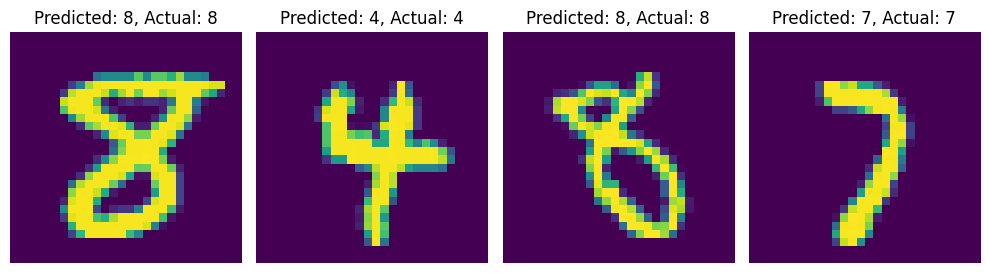

In [15]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### SHAP setup

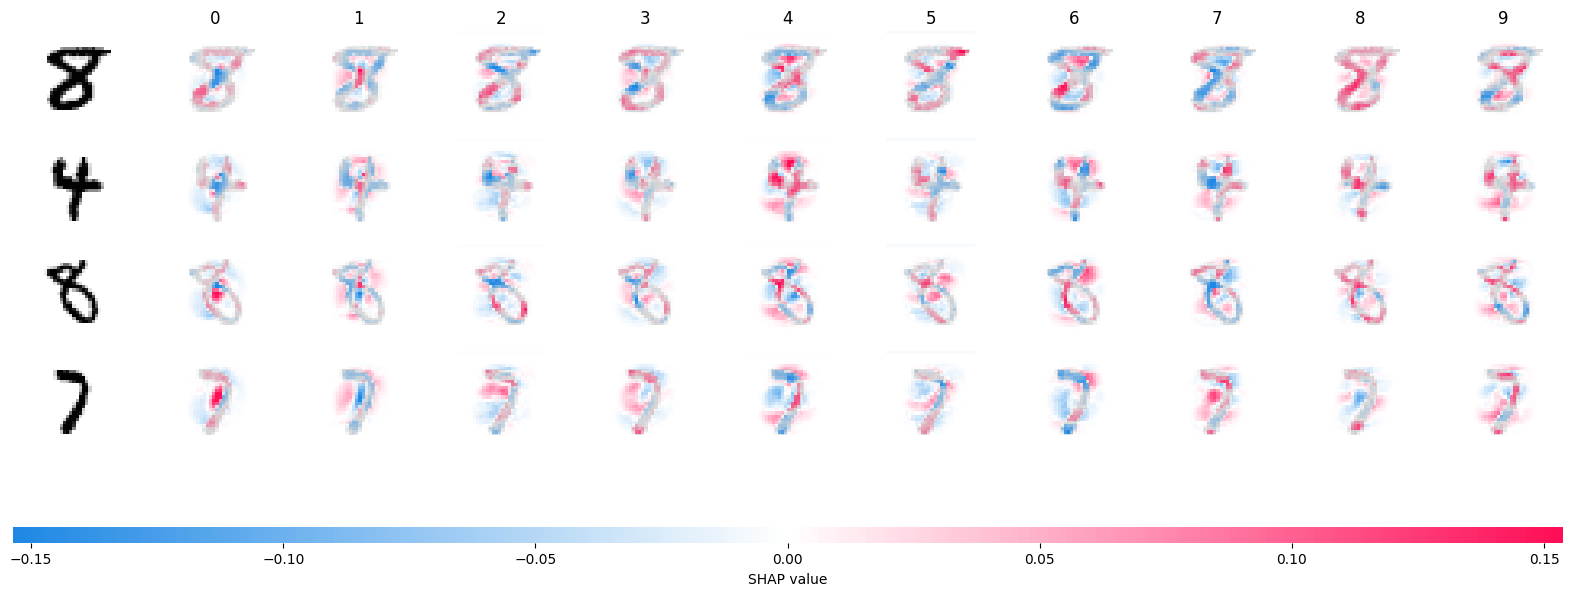

In [16]:
# Create explainer with 1000 random samples as reference data
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample
# You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    # MLP expects a batch channel
    if data.ndim == 1:
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    # Calculate SHAP values for the provided data
    shap_values = explainer.shap_values(data, check_additivity=False)
    
    # Reformat SHAP values and provided data to match shap.image_plot format
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1)
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    
    # Add digit labels to the SHAP plot
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
        
    # Make the SHAP plot!
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels))
    
# Example usage explaining the first 4 samples in the test set
explain_data(X_test[:4])

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?

* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

* 5.3 Why is this not a model agnostic explanation method?

* 5.4 Which digit has the largest probability for **encrypted_image**?

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

**STUDENT ANSWER:**

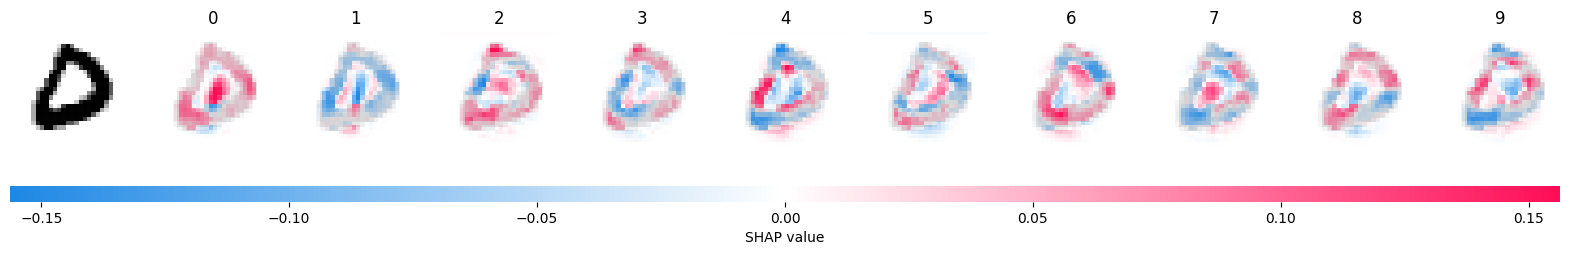

In [26]:
# (hint: use softmax to get the probabilities from the logits)
# TODO: WRITE YOUR CODE/ANSWER HERE

explain_data(X_test[5])

Predicted digit for encrypted_image: 5


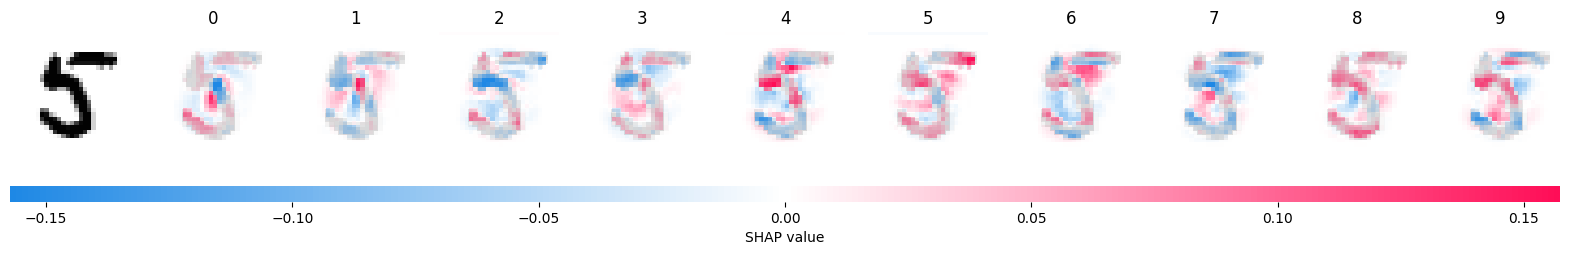

In [33]:
import torch.nn.functional as F

logits = MLP_model(encrypted_image.reshape(1, -1))
probabilities = F.softmax(logits, dim=1)
predicted_digit = torch.argmax(probabilities).item()
print(f"Predicted digit for encrypted_image: {predicted_digit}")

explain_data(X_test[15])

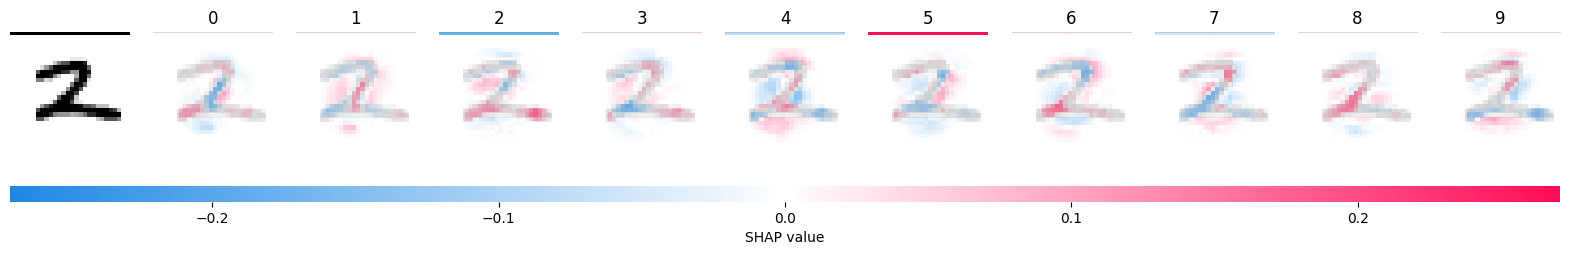

In [36]:
explain_data(encrypted_image)

5.1 The plot above uses SHAP values to explain predictions from an MNIST neural network. Each row represents a different input image (digits 8, 4, 8, and 7 from top to bottom). Each column shows how much the model “sees” the given image as each digit from 0 to 9. Each pixel shows the SHAP value for that location in the image, where red means positive SHAP values , and blue means negative SHAP values.

5.2 We can see a pattern where the areas inside the "loop" of the 0 have more red, indicating these pixels increase the model’s confidence that this is a 0. The blue areas around the outer edges suggest that pixels here reduce the confidence for 0, likely because these regions are more known for the other shapes of numbers. This pattern shows that the model relies on the inner circular structure of the digit to classify it as a 0, which makes sense since 0 is generally round and enclosed.

5.3 This method is not model-agnostic because it needs access to the internals of the model. SHAP is using this to calculate how each pixel influences the output, which makes it dependent on the specific structure of the neural network model, unlike model-agnostic methods that work independently of the model’s details.

5.4 I found that 5 had the highest probability to contain the image.

5.5 The model thinks encrypted_image is a 5, but the explanation shows it's not so easy. The red areas that push the model toward a 5 are actually highlighting parts that look more like a 2—like the leaning line and bottom curve, which is very typical of a 2. There’s even some blue (negative) shading in spots where a 5 would look different, hinting that the model’s not totally confident. It seems like the model’s getting tricked by the altered features, which make it look a bit like both a 2 and a 5. So, we probably shouldn’t fully trust this prediction; the model’s confidence is likely coming from the tampered bits in the 'secret AI stuff' part, not because it actually “sees” a 5.